In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt

from sklearn import datasets


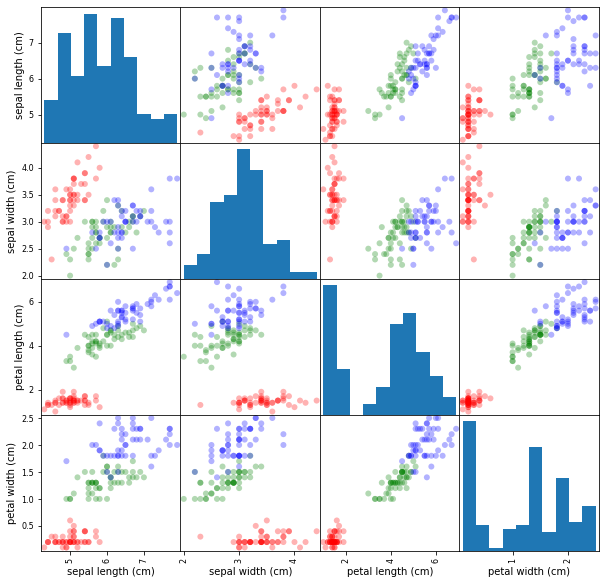

In [2]:
iris = datasets.load_iris()

colors = []
#Utwórz listę na rgb
palette = {0:"red", 1:"green", 2:"blue"}

#Z tablicy iris pobierz "zmienną celu", następnie jeśli c wyniesie 0 to przypisz kolor red 1 green 2 blue
for c in np.nditer(iris.target):
    colors.append(palette[int(c)])

#Z utworzonych kolorów zapisz to do typu dataframe, i narysuj
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sc = pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(10,10), diagonal="hist", color=colors, marker="o", grid="True")

In [5]:
nazwy =['sepal_length','sepal_width','petal_length','petal_width','target']
file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#Zapisz do DataFrame
iris = pd.read_csv(file, header=None, sep=',', decimal='.')
iris.to_csv('iris.data', header=None, sep=',', decimal='.')
# Zobacz typ zmiennej
print(type(iris))

<class 'pandas.core.frame.DataFrame'>


In [6]:
df = pd.read_csv("polish_names.csv")
df['len_name'] = df['name'].map(lambda x: len(x))
df.head(10)

,name,gender,len_name
0,Abdon,m,5
1,Abel,m,4
2,Abercjusz,m,9
3,Abraham,m,7
4,Absalon,m,7
5,Achacjusz,m,9
6,Achacy,m,6
7,Achilles,m,8
8,Ada,f,3
9,Adalbert,m,8


In [8]:
#Załaduj dane z https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
data = pd.read_csv('SMSSpamCollection.csv',sep='\t',header=None)

# Rozdziel dane na zestaw do treningu i do testu, a następnie rodziel liste contentów na format TFIDF
train_x, test_x, train_y, test_y = train_test_split(data[1], data[0])
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train_x = vectorizer.fit_transform(train_x)

#Wykonaj regresję liniową (informacje z poprzednich labolatoriów) i "Przewidź" wartości
classifier = LogisticRegression()
classifier.fit(tfidf_train_x, train_y)
tfidf_test_x = vectorizer.transform(test_x)

#Przeprowadź cross-validation czyli omiń overfiting czyli zabezpiecz żeby sieć nie uczyła się na pamięc zamieniaj dane
scores = cross_val_score(classifier, tfidf_test_x, test_y, cv=5)
acc = scores.mean()
print ("Accuracy: %0.2f percent" % (acc *100)) #Procent poprawnego przewidzenia

#Testowanie wykorzystując api predict
mess = ['YOU WIN IPHONE 7, please call 99999999', "I am ready to invest in dating service"]
output = classifier.predict(vectorizer.transform(mess))
for i ,m in enumerate(mess):
	print (m, ' == ', output[i])

Accuracy: 90.74 percent
YOU WIN IPHONE 7, please call 99999999  ==  ham
I am ready to invest in dating service  ==  ham


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
